<a href="https://colab.research.google.com/github/vedkharat/DataScienceInternship/blob/main/MITU_project8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Name:Ved Dipak Kharat
#Class:TE
#Div:A
#Roll No:35
#College:Keystone School of Engineering

Problem Statement:<br>
 Dataset containing information about tips given by restaurant customers,
 including details such as total bill, tip amount, gender, day of the week, time of day, and
 more.<br>

  Sample Questions:
 1. Print the total number of entries in the dataset.
 2. What is the average tip amount?
 3. How many male and female customers are there in the dataset?
 4. Print the names of customers who left a tip greater than $10.
 5. How many entries are there for each day of the week?
 6. Print the average total bill amount for each day of the week.
 7. How many entries are there for lunch and dinner?
 8. Print the names of customers who visited on Sunday.
 9. Plot the distribution of tip amounts.
 10.Plot the average tip amount by time of day.
 11.Calculate the percentage of total bill amount given as a tip for each entry.
 12.Print the names of customers who gave the highest and lowest percentages of
 tips.
 13.Plot the distribution of total bill amounts by day of the week.
 14.Plot the average total bill amount by party size.
 15.Calculate the correlation between total bill amount and tip amount

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('/content/tips.csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace=True)
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(243, 7)

1. Print the total number of entries in the dataset.<br>
The Total no of entries is nothing but the total no of rows present in the dataset.We can find that using df.shape

In [10]:
total_entries=df.shape[0]
total_entries

243

2. What is the average tip amount?<br>
we can use the mean() function to find out the avg tip which is approximately 3$

In [11]:
avg_tips=df['tip'].mean()
avg_tips

3.00238683127572

3.How many male and female customers are there in the dataset?<br>
We can find this using value_counts()function.There are 157 Males and 87 Females  

In [12]:
df['sex'].value_counts()

sex
Male      157
Female     86
Name: count, dtype: int64

 4. Print the names of customers who left a tip greater than $10.<br>
 TBC

In [13]:
names=df['tip']>=10
df[names]

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.0,Male,Yes,Sat,Dinner,3


 5. How many entries are there for each day of the week?<br>
 To slove this problem we can use the value_count()function.<br>


In [14]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    61
Fri     19
Name: count, dtype: int64

Number of entries for the each day of week are :<br>
Sat: 87<br>
Sun: 76<br>
Thur: 61<br>
Fri: 19

 6. Print the average total bill amount for each day of the week.<br>
 We can use the groupby()function to get mean of totalbill on the basis of days.Also astype()function is used to covert datatype from float to int.

In [15]:
avg_bill_amt=df.groupby('day')['total_bill'].mean()
avg_bill_amt

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.759508
Name: total_bill, dtype: float64

In [16]:
avg_bill_amt=df.groupby('day')['total_bill'].mean().astype(int)
avg_bill_amt

day
Fri     17
Sat     20
Sun     21
Thur    17
Name: total_bill, dtype: int64

 7. How many entries are there for lunch and dinner?


In [17]:
Time=df['time'].value_counts()
Time

time
Dinner    176
Lunch      67
Name: count, dtype: int64

There are 67 entries for the  lunch and 176 entries for Dinner

 8. Print the names of customers who visited on Sunday<br>
 TOC

In [18]:
visit_sunday=df[df['day'] == 'Sun']
visit_sunday

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
186,20.90,3.50,Female,Yes,Sun,Dinner,3
187,30.46,2.00,Male,Yes,Sun,Dinner,5
188,18.15,3.50,Female,Yes,Sun,Dinner,3
189,23.10,4.00,Male,Yes,Sun,Dinner,3


 9. Plot the distribution of tip amounts.

Text(0, 0.5, 'Frequency')

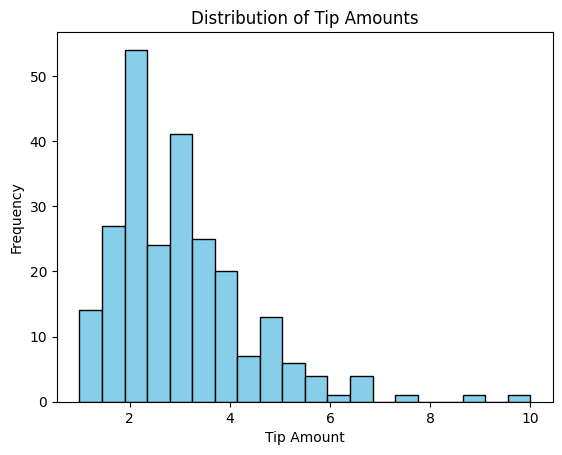

In [19]:
plt.hist(df['tip'],bins=20,color='skyblue', edgecolor='black')
plt.title('Distribution of Tip Amounts')
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')


 10.Plot the average tip amount by time of day.<br>

In [20]:
avg_tip_amt=df.groupby('time')['tip'].mean()
avg_tip_amt

time
Dinner    3.102670
Lunch     2.738955
Name: tip, dtype: float64

Text(0, 0.5, 'Average Tip Amount')

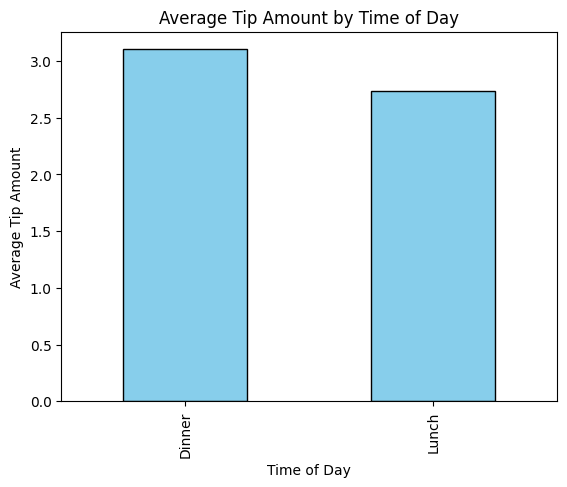

In [21]:
avg_tip_amt.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Tip Amount by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Tip Amount')


11.Calculate the percentage of total bill amount given as a tip for each entry.<br>
To Calculate the percentage of total bill amount given as a tip for each entry we need to create new column named as tip_percentage.Which can be created by using tips/total_bill*100.

In [22]:
df['tip_percentage'] = (df['tip'] / df['total_bill']) * 100
df

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


In [23]:
df['tip_percentage']

0       5.944673
1      16.054159
2      16.658734
3      13.978041
4      14.680765
         ...    
239    20.392697
240     7.358352
241     8.822232
242     9.820426
243    15.974441
Name: tip_percentage, Length: 243, dtype: float64

12.Print the names of customers who gave the highest and lowest percentages of tips.<br>
we can tip_percentage column and find and find lowest and highest percentages by using min()and max() functions.

In [24]:
 highest_precent_tips = df['tip_percentage'].max()
 highest_precent_tips

71.0344827586207

In [25]:
 lowest_precent_tips = df['tip_percentage'].min()
 lowest_precent_tips

3.563813585135547

13.Plot the distribution of total bill amounts by day of the week.<br>
we are going to use the avg_bill_amt which we have created before.

Text(0, 0.5, 'Average Total Bill Amount')

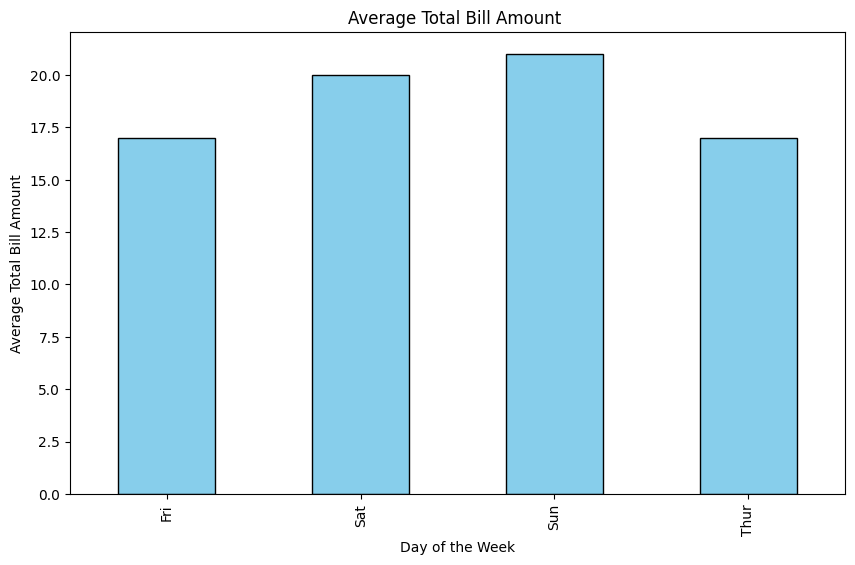

In [26]:
plt.figure(figsize=(10, 6))
avg_bill_amt.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Total Bill Amount ')
plt.xlabel('Day of the Week')
plt.ylabel('Average Total Bill Amount')

14.Plot the average total bill amount by party size.<br>

In [27]:
avg_totalbill_party_size = df.groupby('size')['total_bill'].mean()
avg_totalbill_party_size

size
1     7.242500
2    16.470258
3    23.277632
4    28.613514
5    30.068000
6    34.830000
Name: total_bill, dtype: float64

Text(0, 0.5, 'Average Total Bill Amount')

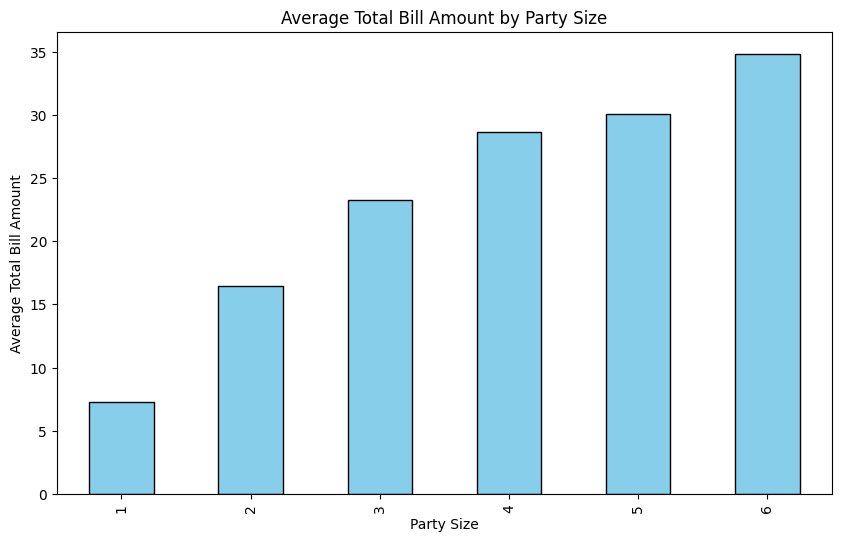

In [28]:
plt.figure(figsize=(10, 6))
avg_totalbill_party_size.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Total Bill Amount by Party Size')
plt.xlabel('Party Size')
plt.ylabel('Average Total Bill Amount')

 15.Calculate the correlation between total bill amount and tip amount<br>
 we can use corr() function to find the correlation between the total bill and tip.As the output value is positive we can say that as x value of increases the value of y also increases.

Text(0.05, 0.8, 'Correlation =0.67')

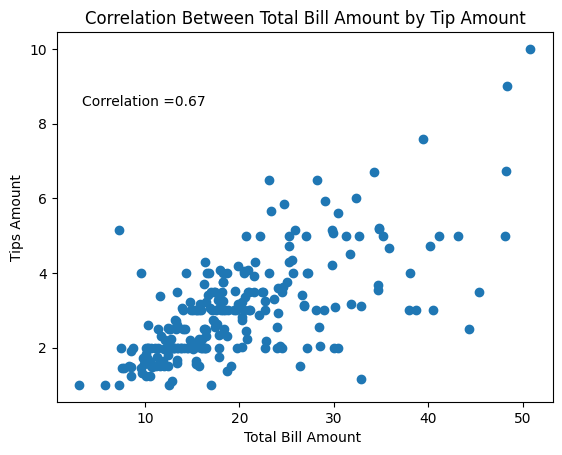

In [29]:
x=df['total_bill']
y=df['tip']
plt.scatter(x,y,marker='o')
plt.title('Correlation Between Total Bill Amount by Tip Amount')
plt.xlabel('Total Bill Amount ')
plt.ylabel('Tips Amount')
r=df['total_bill'].corr(df['tip'])
ax = plt.gca()
plt.text(.05, .8, "Correlation ={:.2f}".format(r), transform=ax.transAxes)

From the above graph we can see that as the value of x increases the value of y also increases.<br>


In [30]:
corr = df['total_bill'].corr(df['tip'])
corr

0.6749978565456075